# Machine Learing-Assignment1

### **Prepration : Mohamed Hossam Mohamed Darwish** 

**In this notebook we will demonstrate our understanding of regression and classification models by** 
**applying Linear Regression (Simple and Multiple), Polynomial Regression, and Logistic** 
**Regression on real-world datasets.**



## 1. Linear Regression(Simple & Multiple)

**But before starting work in Linear Regression & Polynomial Regression.**
**We will use The Car Price Prediction dataset from [Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) For trainig and testing the models**

**Lets Start Working**

### 1. Importing Required Libraries

#### First. The most used libraries in all Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Second. The Libraries and Methods For Linear Regression

In [2]:
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### 2. Exploratory Data Analysis

In [3]:
# Load the dataset
df = pd.read_csv(r"../../data/CarPricePrediction.csv")  

# Preview dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
print(df.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


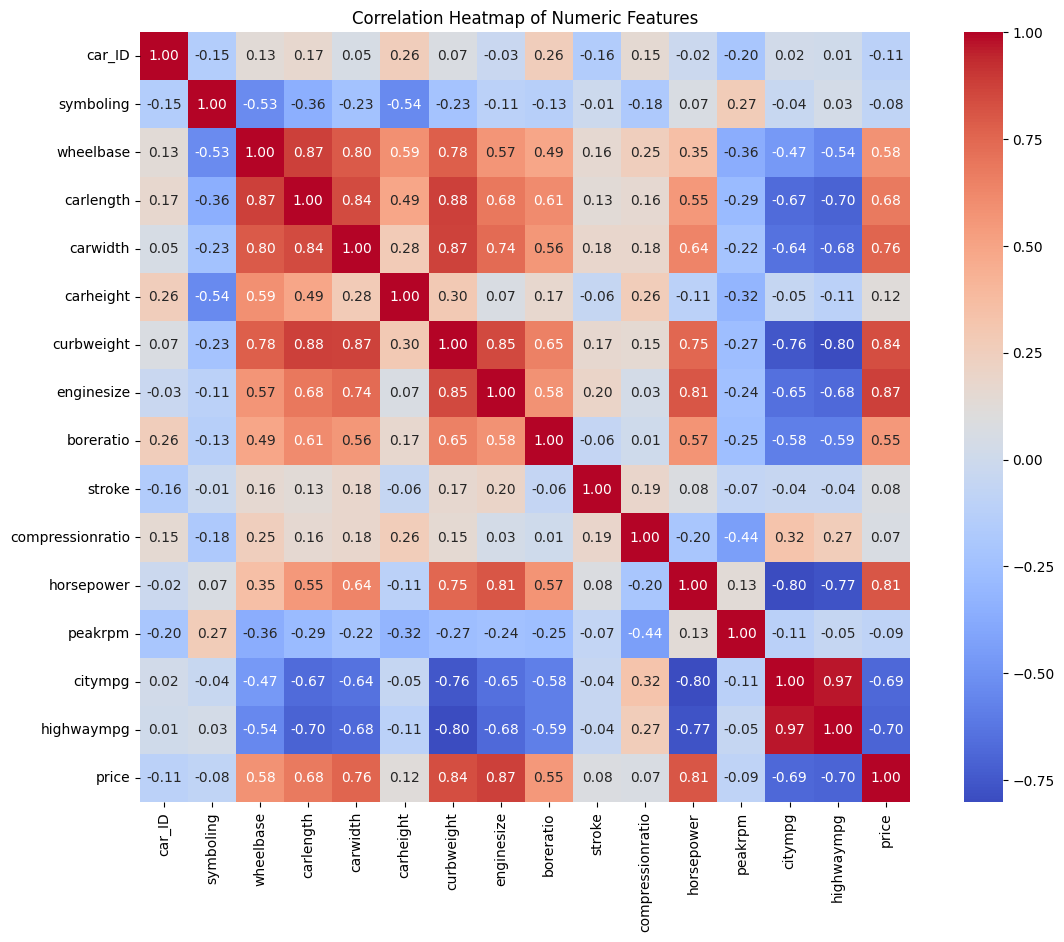

In [6]:
# Correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

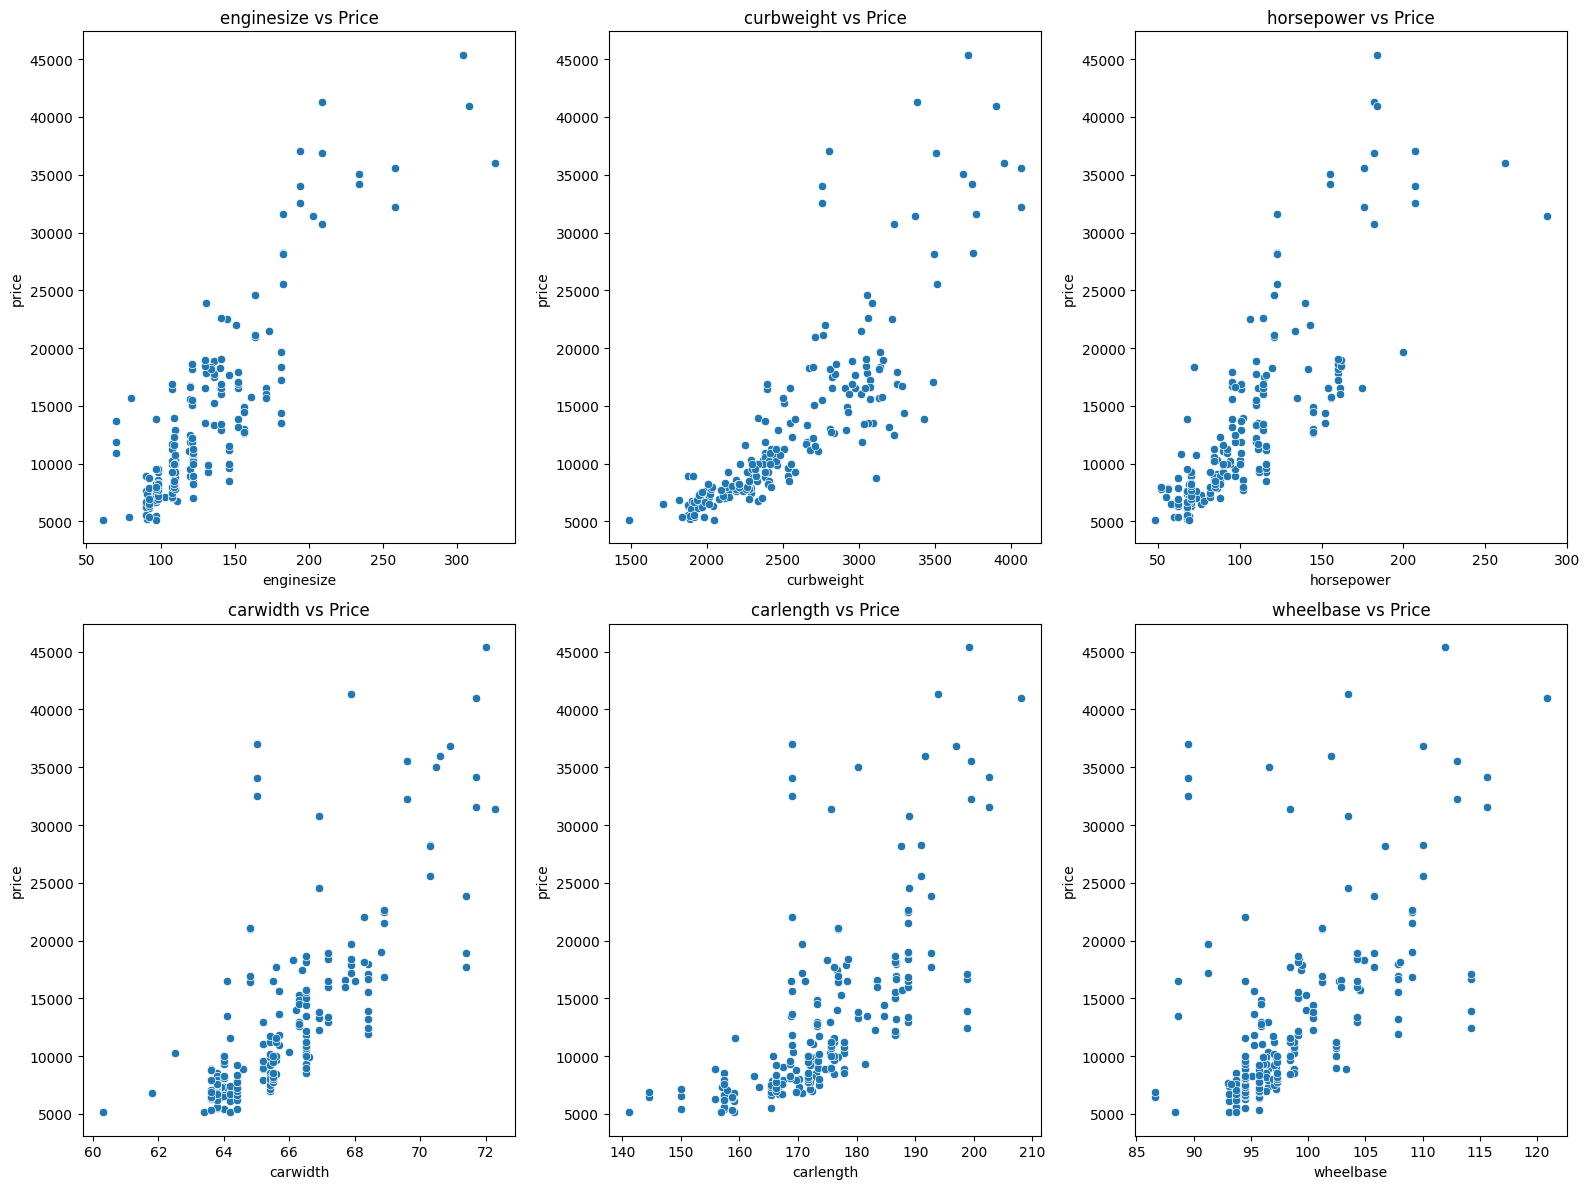

In [7]:
top_features = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase']

plt.figure(figsize=(16, 12))
for idx, feature in enumerate(top_features):
    plt.subplot(2, 3, idx+1)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs Price')

plt.tight_layout()
plt.show()

### 3. Preprocessing

In [8]:
# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
df_log = df.drop(['car_ID', 'CarName'], axis=1)

# Convert categorical to numeric using one-hot encoding
df_encoded = pd.get_dummies(df_log, drop_first=True)

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 4. Simple Linear Regression

Simple Linear Regression R²: 0.8040958796678975
Simple Linear Regression MSE: 15465458.96590847


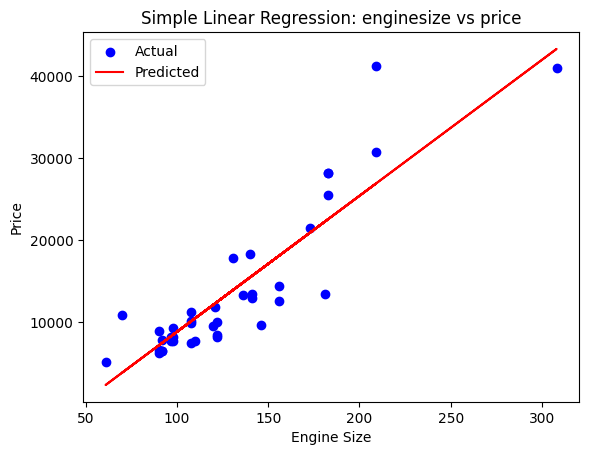

In [9]:
# import LinearRegression To create a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Simple Linear Regression using 'enginesize'
X_simple = df_encoded[['enginesize']]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Predict and evaluate
y_pred_s = model_simple.predict(X_test_s)
print("Simple Linear Regression R²:", r2_score(y_test_s, y_pred_s))
print("Simple Linear Regression MSE:", mean_squared_error(y_test_s, y_pred_s))

# Plot
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.title("Simple Linear Regression: enginesize vs price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.legend()
plt.show()


### 5. Multiple Linear Regression

In [10]:
# Apply Multiple Linear Regression
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predict and evaluate
y_pred_m = model_multi.predict(X_test)
print("Multiple Linear Regression R²:", r2_score(y_test, y_pred_m))
print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred_m))


Multiple Linear Regression R²: 0.892556670032023
Multiple Linear Regression MSE: 8482008.484371925


## 2. Polynomial Regression


Polynomial Regression (degree 2)
R²: 0.8019117595258491
MSE: 15637882.192006022


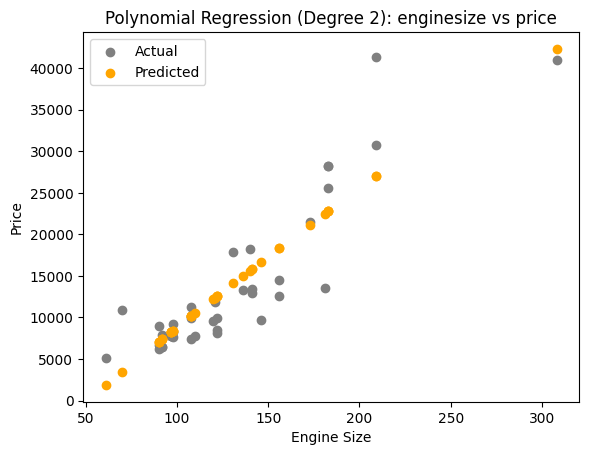


Polynomial Regression (degree 3)
R²: 0.8527894915178168
MSE: 11621389.455322495

Polynomial Regression (degree 4)
R²: 0.8524297335610764
MSE: 11649790.194971029


In [11]:
# Import PolynomialFeatures for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_simple)

    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model_poly = LinearRegression()
    model_poly.fit(X_train_p, y_train_p)

    y_pred_p = model_poly.predict(X_test_p)

    print(f"\nPolynomial Regression (degree {d})")
    print("R²:", r2_score(y_test_p, y_pred_p))
    print("MSE:", mean_squared_error(y_test_p, y_pred_p))

    # Plot for visualization (only for degree 2 to avoid clutter)
    if d == 2:
        plt.scatter(X_test_s, y_test_s, color='gray', label='Actual')
        plt.scatter(X_test_s, y_pred_p, color='orange', label='Predicted')
        plt.title("Polynomial Regression (Degree 2): enginesize vs price")
        plt.xlabel("Engine Size")
        plt.ylabel("Price")
        plt.legend()
        plt.show()


## 3. Logistic Regression (Classification) 

**Before starting work in Logistic Regression.**
**We will use The Titanic dataset from [Kaggle](https://www.kaggle.com/datasets/heptapod/titanic) For trainig and testing the model.**

## 1. Import Libraries

In [12]:
# Logistic Regression with Classification - Titanic Survival Dataset

# 1. Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

### 2. Load and Prepare the Dataset

In [13]:
# 2. Load and Prepare the Dataset
df_log = pd.read_csv(r"../../data/Titanic.csv")

### 3.Exploratory Data Analysis

In [14]:
df_log.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [16]:
print(df_log.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [17]:
df_log.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  4. Data Preprocessing

In [18]:
# Drop some columns 
#df_log.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True , axis=1)

# Fill missing values
df_log['age'].fillna(df_log['age'].median(), inplace=True)
df = df_log.dropna()
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [19]:
# Encode 'sex' and 'embarked'
df_log['sex'] = df['sex'].map({'male': 0, 'female': 1})
df_log = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df_log.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,False,False,False
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
6,0,1,54.0,0,0,51.8625,First,man,True,E,Southampton,no,True,True,False,True
10,1,3,4.0,1,1,16.7000,Third,child,False,G,Southampton,yes,False,False,False,True
11,1,1,58.0,0,0,26.5500,First,woman,False,C,Southampton,yes,True,False,False,True


In [20]:
# Choose features and target
X = df_log.drop('survived', axis=1)
y = df_log['survived']

# Ensure all features are numeric by dropping non-numeric columns
X = X.select_dtypes(include=[np.number])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

###  5. Modeling with Logistic Regression

In [22]:
# 5. Modeling with Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# 6. Model Evaluation
cm = confusion_matrix(y_test, y_pred)


In [23]:
# --- Grid Search for Logistic Regression ---
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000]
}

# Setup GridSearchCV
log_reg = LogisticRegression()
grid_logreg = GridSearchCV(log_reg, param_grid, cv=5)

# Fit model
grid_logreg.fit(X_train, y_train)

# Best params and score
print("Best logistic regression parameters:", grid_logreg.best_params_)
print("Best cross-validated score:", grid_logreg.best_score_)

Best logistic regression parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated score: 0.65


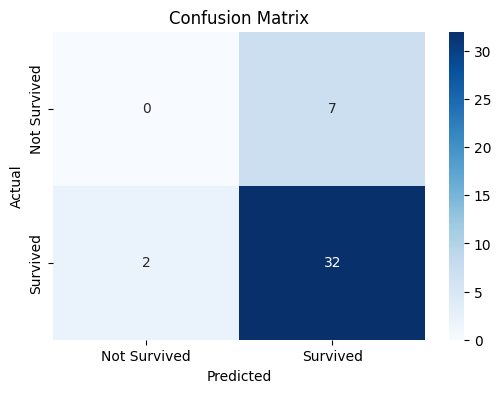

In [24]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))



Classification Report:
              precision    recall  f1-score   support

Not Survived       0.00      0.00      0.00         7
    Survived       0.82      0.94      0.88        34

    accuracy                           0.78        41
   macro avg       0.41      0.47      0.44        41
weighted avg       0.68      0.78      0.73        41



## 7 📖 **Summary**

### **Findings from the Code**
1. **Linear Regression:**
* Simple Linear Regression using enginesize showed a clear relationship between engine size and price.
* Multiple Linear Regression improved the model's performance by incorporating multiple features.
  
2. **Polynomial Regression:**
* Higher-degree polynomial models captured non-linear relationships better.
* Degree-2 polynomial regression provided a good balance between complexity and performance.

3. **Logistic Regression:**
* The Titanic dataset required significant preprocessing to handle missing values and categorical variables.
* The logistic regression model performed well, as evidenced by the confusion matrix and classification report.

### **Key Insights:**
- Regression models (linear and polynomial) effectively predicted car prices based on features.
- Logistic regression successfully classified Titanic passengers' survival with reasonable accuracy after preprocessing.
- Proper data preprocessing (handling missing values, encoding, scaling) is critical for model performance.

### **Limitations**
- Missing values in the datasets required imputation, which might have introduced bias.
- Logistic Regression could be improved with more advanced feature engineering.